# Part 1:Introduction 


Understanding the factors that influence housing prices is a central problem in real estate analytics, urban planning, and financial decision-making. In this project, we analyze a comprehensive dataset of residential home sales from Ames, Iowa, originally compiled by Dean De Cock and widely used as a benchmark in predictive modeling. The dataset contains detailed information on the physical characteristics of each property, including structural attributes (such as overall material quality, number of rooms, and total living area), lot features, building type, utilities, basement and garage conditions, as well as sale timing and transaction details.

Our goal is to build a predictive model for SalePrice, the market value of each property, using the rich set of features provided. With more than 70 variables spanning numeric measurements, categorical classifications, and quality ratings, the dataset allows us to explore relationships between housing characteristics and price at a granular level. This also provides an opportunity to apply the full workflow of statistical learning: data cleaning, exploratory data analysis, feature engineering, model building, and evaluation.

## EDA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Inspect the Data

In [6]:
test = pd.read_csv('kaggledata/test.csv')

In [7]:
train = pd.read_csv('kaggledata/train.csv')

In [8]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [9]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
train.shape

(1460, 81)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Deal with Missing Values

In [13]:
missing = train.isnull().sum().sort_values(ascending=False)
missing

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
Id                0
ExterCond         0
Length: 81, dtype: int64

In [14]:
missing[missing > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrArea         8
Electrical         1
dtype: int64

In [15]:
import sys
from pathlib import Path
sys.path.append(str(Path("..").resolve()))
from src.ames_cleaning import clean_ames_missing




In [16]:
train_clean = clean_ames_missing(train)
train_clean

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125


In the Ames Housing dataset, many variables contain NA values, but these NAs do not represent missing or unobserved data. Instead, according to the data documentation, NA typically indicates that the house does not have that feature (e.g., no pool, no fireplace, no garage, no basement). Because these are structural NAs rather than true missingness, removing these variables would discard meaningful information about the property.

For example, features such as PoolQC, MiscFeature, Alley, Fence, and FireplaceQu have many NAs because most homes simply do not have those elements. Treating these as missing would be misleading; instead, they are encoded as a separate category "None", which preserves the important distinction between “feature exists” and “feature does not exist.”

Similarly, basement- and garage-related variables (e.g., BsmtQual, BsmtCond, BsmtExposure, GarageType, GarageFinish) contain NA values only when the house has no basement or no garage. These NAs are not errors and should not cause the variable to be dropped. We therefore fill categorical basement/garage NAs with "None" and fill numeric areas (e.g., TotalBsmtSF, GarageArea) with 0, which correctly represents the absence of that space.

Only a small number of features contain true missing values. For instance, LotFrontage is missing for 259 observations; we impute these using the median LotFrontage within each Neighborhood, which respects neighborhood-level variation in lot characteristics. MasVnrType and MasVnrArea are imputed with "None" and 0 respectively, and the single missing value in Electrical is filled using the mode ("SBrkr").

Overall, none of the variables are dropped, because the missingness is either meaningful (indicating absence of a feature) or minimal and easily imputed. Keeping all variables preserves predictive information and is consistent with best practices for this dataset.

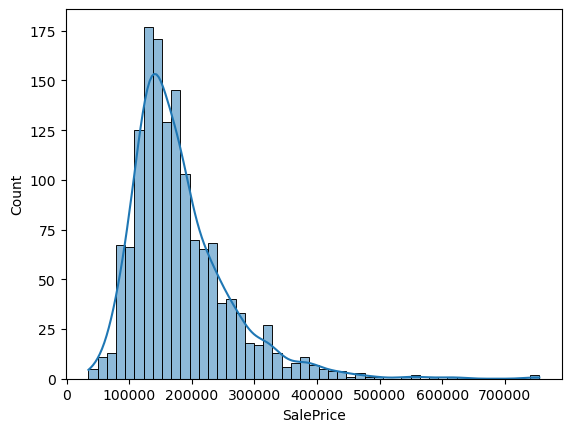

In [17]:
sns.histplot(train_clean["SalePrice"], kde=True)
plt.savefig("Graph/saleprice.png", bbox_inches="tight")

## Remove outliers using the IQR method

In [18]:
# Compute Q1, Q3, and IQR
Q1 = train_clean["SalePrice"].quantile(0.25)
Q3 = train_clean["SalePrice"].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound


(3937.5, 340037.5)

In [19]:
train_no_outlier = train_clean[
    (train_clean["SalePrice"] >= lower_bound) &
    (train_clean["SalePrice"] <= upper_bound)
]

train_no_outlier


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125


### number of outliers removed

In [20]:
num_removed = train_clean.shape[0] - train_no_outlier.shape[0]
num_removed

61

The distribution of SalePrice is strongly right-skewed, with the majority of homes priced between $120,000 and $220,000 and a long tail of high-priced properties extending beyond $400,000. This skewness suggests the presence of a small number of luxury or unusually large homes, which act as outliers and can disproportionately influence statistical models. So i want to use IQR model to move those outliers and make the plot more normal.

### plot after the remove of outliers

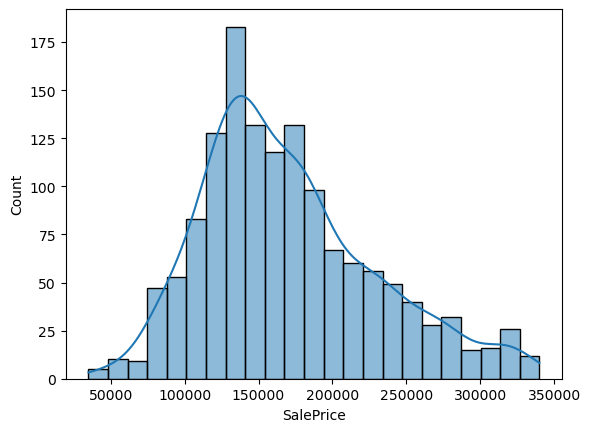

In [21]:
sns.histplot(train_no_outlier["SalePrice"], kde=True)
plt.savefig("Graph/adjustsaleprice.png", bbox_inches="tight")

In [22]:
train = train_no_outlier.copy()
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125


In [23]:
train.to_csv("kaggledata/clean_train.csv", index=False)

## Correlation Analysis with Numeric Features

In [24]:
numeric = train.select_dtypes(include=[np.number])
corr = numeric.corr()["SalePrice"].sort_values(ascending=False)
corr.head(15)

SalePrice       1.000000
OverallQual     0.784294
GrLivArea       0.661325
GarageCars      0.628013
GarageArea      0.607230
FullBath        0.577369
YearBuilt       0.564558
TotalBsmtSF     0.543508
YearRemodAdd    0.541161
1stFlrSF        0.522785
GarageYrBlt     0.507894
TotRmsAbvGrd    0.472292
Fireplaces      0.453010
MasVnrArea      0.350541
OpenPorchSF     0.325791
Name: SalePrice, dtype: float64

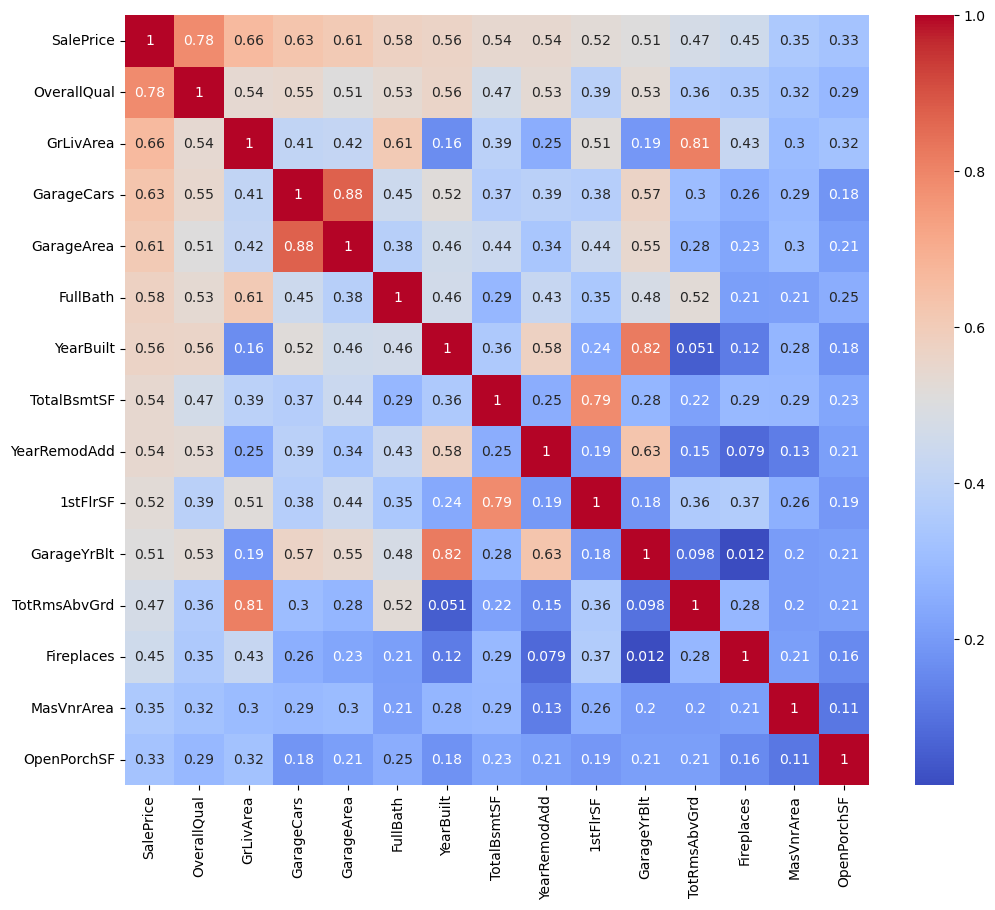

In [25]:
plt.figure(figsize=(12, 10))
top_corr = corr.index[:15]
sns.heatmap(train[top_corr].corr(), annot=True, cmap="coolwarm")
plt.savefig("Graph/feature_correlation_heatmap.png", bbox_inches="tight")

## Scatterplots for Key Numerical Predictors

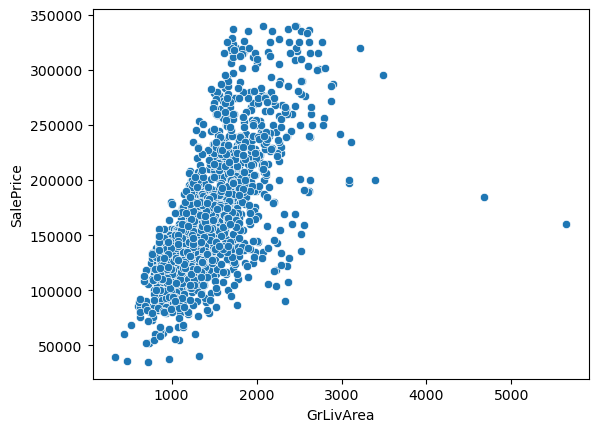

In [27]:
sns.scatterplot(data=train, x="GrLivArea", y="SalePrice")
plt.savefig("Graph/GrLivArea_saleprice_corr.png", bbox_inches="tight")

GrLivArea: Above grade (ground) living area square feet

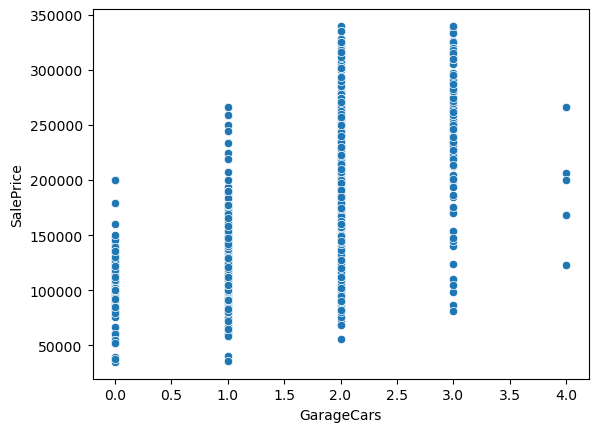

In [28]:
sns.scatterplot(data=train, x="GarageCars", y="SalePrice")
plt.savefig("Graph/GarageCars_saleprice_corr.png", bbox_inches="tight")

GarageCars: Size of garage in car capacity

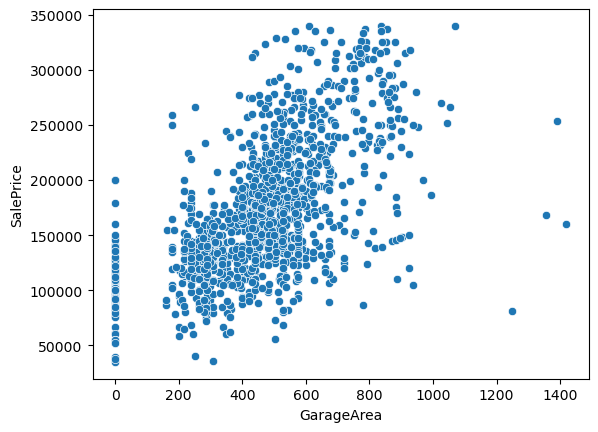

In [29]:
sns.scatterplot(data=train, x="GarageArea", y="SalePrice")
plt.savefig("Graph/GarageArea_saleprice_corr.png", bbox_inches="tight")

GarageArea: Size of garage in square feet

## Correlation Analysis with Categorical Features

### Use ANOVA F-test to rank categorical variables and find the top 5 categorical variable related to sale price

In [30]:
cat_vars = train.select_dtypes(include=["object"]).columns
cat_vars

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [31]:
import scipy.stats as stats

def anova_pvalue(col):
    groups = []
    for level in train[col].dropna().unique():
        groups.append(train.loc[train[col] == level, "SalePrice"])
    return stats.f_oneway(*groups).pvalue

anova_results = {}

for col in cat_vars:
    try:
        p = anova_pvalue(col)
        anova_results[col] = p
    except:
        # skip columns that break ANOVA
        pass

# Sort by smallest p-value (strongest predictor)
sorted_cats = sorted(anova_results, key=anova_results.get)[:5]
sorted_cats


['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish']

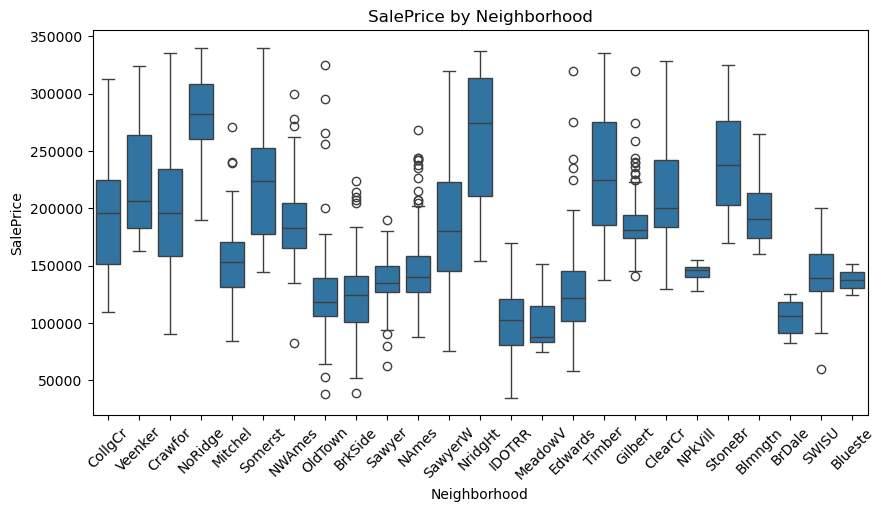

<Figure size 640x480 with 0 Axes>

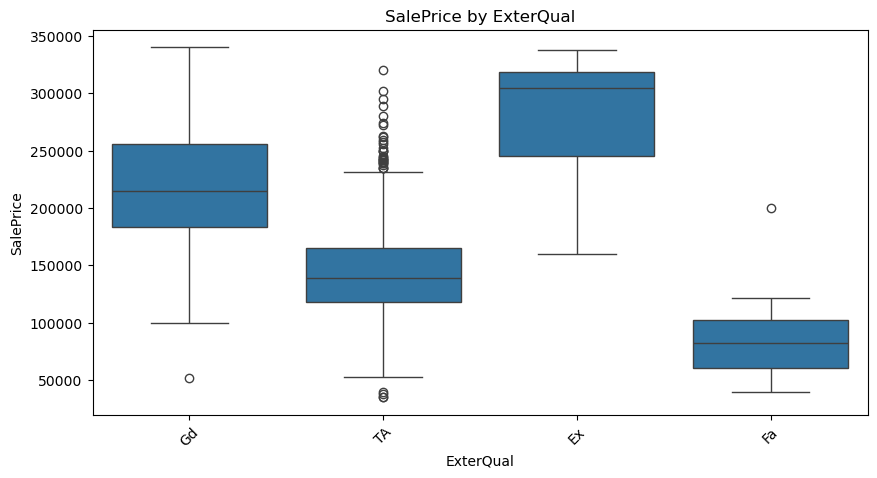

<Figure size 640x480 with 0 Axes>

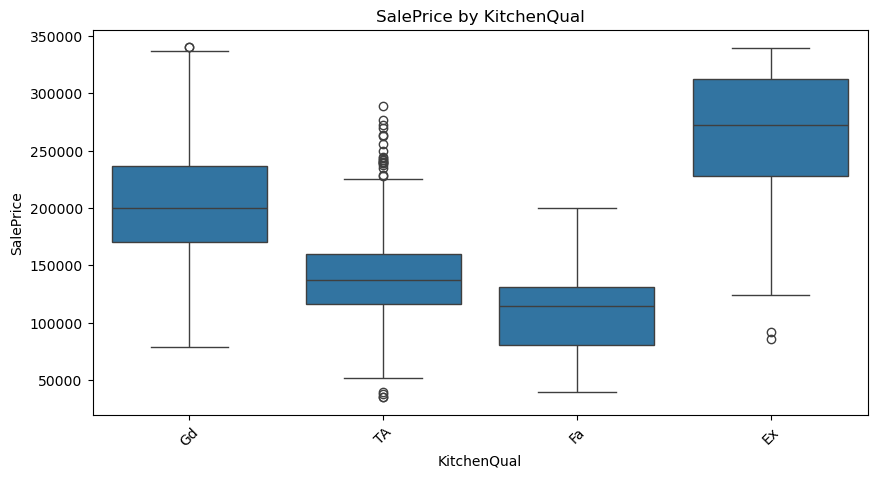

<Figure size 640x480 with 0 Axes>

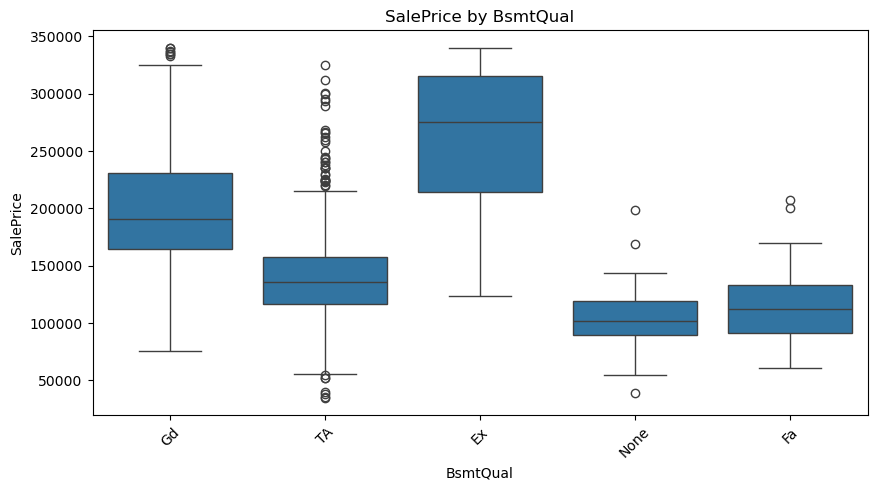

<Figure size 640x480 with 0 Axes>

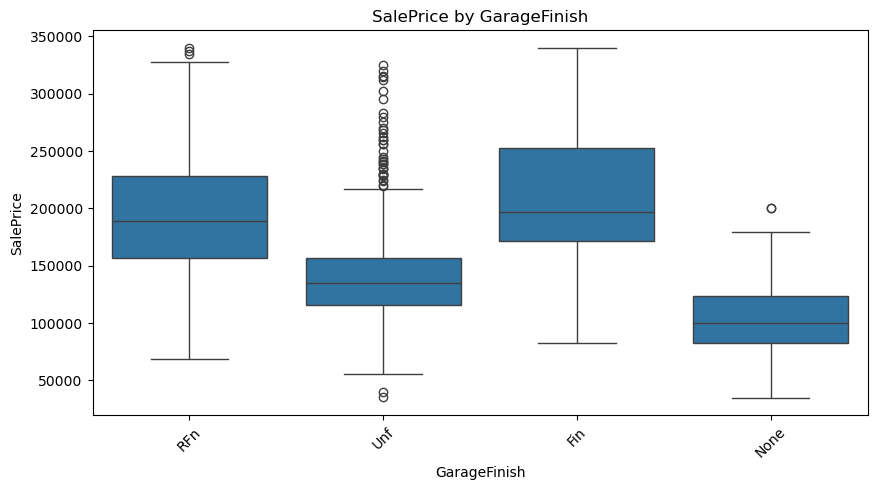

<Figure size 640x480 with 0 Axes>

In [32]:
top5 = sorted_cats
for col in top5:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=col, y="SalePrice", data=train)
    plt.xticks(rotation=45)
    plt.title(f"SalePrice by {col}")
    plt.show()
    filename = f"Graph/saleprice_by_{col}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")